In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numba as nb
import ODEsolver as solve
from run import g, temp, gs, gss
from run import with_spline_ODE, steps_taken
from Emma import sterile_production

#### Finding ranges of $L_0$ for $\Omega_s h^2$ between 0.01-0.5:


$\nu_e$

In [2]:
#sterile_production(1000, 'electron', 0.0071, 10**(-10), 1e-100, make_plot=False, folder_name="Neutrino Data")

In [3]:
#sterile_production(1000, 'electron', 0.0071, 10**(-10), 47.2e-4, make_plot=False, folder_name="Neutrino Data")

$\nu_{\mu}$

In [4]:
#sterile_production(1000, 'muon', 0.0071, 10**(-10), 1e-100, make_plot=False, folder_name="Neutrino Data")

In [5]:
#sterile_production(1000, 'muon', 0.0071, 10**(-10), 47.4e-4, make_plot=False, folder_name="Neutrino Data")

$\nu_{\tau}$

In [6]:
#sterile_production(1000, 'tau', 0.0071, 10**(-10), 1e-100, make_plot=False, folder_name="Neutrino Data")

In [7]:
#sterile_production(1000, 'tau',0.0071, 10**(-10), 50.6e-4, make_plot=False, folder_name="Neutrino Data")

So it looks like the lower limit of $\Omega_s h^2$ for $\nu_e$ and $\nu_{\mu}$ is 0.0024 and the lower limit for $\nu_{\tau}$ is 0.0722. This is because it is predominantly non resonant production.


## $\Omega_s h^2$ vs. $L_0$

In [8]:
lep_values = np.linspace(0.1e-4, 40e-4, 10)
oh2_values_e = np.zeros(len(lep_values))
oh2_values_mu = np.zeros(len(lep_values))
oh2_values_tau = np.zeros(len(lep_values))

for i in range(len(lep_values)):
    oh2_values_e[i] = sterile_production(1000, 'electron', 0.0071, 10**(-10), lep_values[i], make_plot=False, folder_name="Neutrino Data")
    oh2_values_mu[i] =sterile_production(1000, 'muon', 0.0071, 10**(-10), lep_values[i], make_plot=False, folder_name="Neutrino Data")
    oh2_values_tau[i] =sterile_production(1000, 'tau', 0.0071, 10**(-10), lep_values[i], make_plot=False, folder_name="Neutrino Data")

Text(0, 0.5, '$\\Omega_s h^2$')

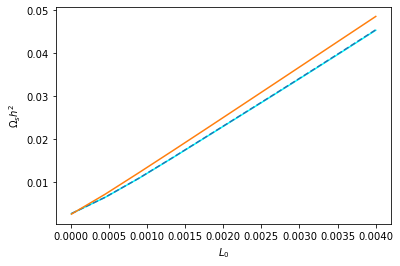

In [9]:
plt.plot(lep_values, oh2_values_e, color = 'cyan')
plt.plot(lep_values, oh2_values_mu,'--')
plt.plot(lep_values, oh2_values_tau)
#plt.xlim(0,0.001)
#plt.ylim(0.01,0.1)
plt.xlabel('$L_0$')
plt.ylabel('$\Omega_s h^2$')

## Same $L_0$, different flavor

In [10]:
sterile_production(1000, 'electron', 0.0071, 10**(-10), 7.6e-4, make_plot=False, folder_name="Neutrino Data")
sterile_production(1000, 'muon', 0.0071, 10**(-10), 7.6e-4, make_plot=False, folder_name="Neutrino Data")
sterile_production(1000, 'tau', 0.0071, 10**(-10), 7.6e-4, make_plot=False, folder_name="Neutrino Data")

0.010650000100195506

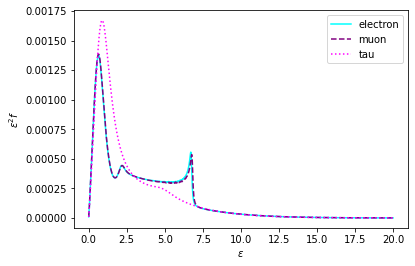

In [11]:
dat_e = np.load('Neutrino Data/electronx0.00076x1e-10.npz')
dat_mu = np.load('Neutrino Data/muonx0.00076x1e-10.npz')
dat_tau = np.load('Neutrino Data/taux0.00076x1e-10.npz')

fe_e = dat_e['final_distribution']
fe_mu = dat_mu['final_distribution']
fe_tau = dat_tau['final_distribution']
epsilon = dat_e['epsilon']
plt.figure()
plt.plot(epsilon, epsilon**(2)*fe_e, color = 'cyan' )
plt.plot(epsilon, epsilon**(2)*fe_mu, '--', color = 'purple')
plt.plot(epsilon, epsilon**(2)*fe_tau, ':', color = 'magenta')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r"$\epsilon^2 f$")
#plt.xlim(0,2)
plt.legend(['electron', 'muon', 'tau'])

## Same flavor, different $L_0$

In [12]:
sterile_production(1000, 'electron', 0.0071, 10**(-10), 7.6e-4, make_plot=False, folder_name="Neutrino Data")
sterile_production(1000, 'electron', 0.0071, 10**(-10), 11e-4, make_plot=False, folder_name="Neutrino Data")
sterile_production(1000, 'electron', 0.0071, 10**(-10), 13e-4, make_plot=False, folder_name="Neutrino Data")

0.015246699714163429

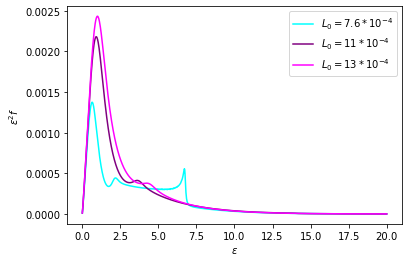

In [13]:
data_e = np.load('Neutrino Data/electronx0.00076x1e-10.npz')
data_mu = np.load('Neutrino Data/electronx0.0011x1e-10.npz')
data_tau = np.load('Neutrino Data/electronx0.0013x1e-10.npz')

fe_e = data_e['final_distribution']
fe_mu = data_mu['final_distribution']
fe_tau = data_tau['final_distribution']
epsilon = data_e['epsilon']
plt.figure()
plt.plot(epsilon, epsilon**(2)*fe_e, color = 'cyan' )
plt.plot(epsilon, epsilon**(2)*fe_mu,  color = 'purple')
plt.plot(epsilon, epsilon**(2)*fe_tau, color = 'magenta')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r"$\epsilon^2 f$")
#plt.xlim(0.8,1.75)
plt.legend(['$L_0 = 7.6*10^{-4}$', '$L_0 = 11*10^{-4}$', '$L_0 = 13*10^{-4}$'])

note: why does it look like $L_0 = 11*10^{-4}$ has the highest resonance?

# OG flavor + lepton number

In [14]:
sterile_production(1000, 'electron', 0.064, 10**(-10), 7.6e-4, make_plot=False, folder_name="Neutrino Data")
sterile_production(1000, 'muon', 0.064, 10**(-10), 11e-4, make_plot=False, folder_name="Neutrino Data")
sterile_production(1000, 'tau', 0.064, 10**(-10), 13e-4, make_plot=False, folder_name="Neutrino Data")

0.18456264923609045

# Testing $\Omega_s h^2$ countour plot corner values

##### electron

0.011983192242771609

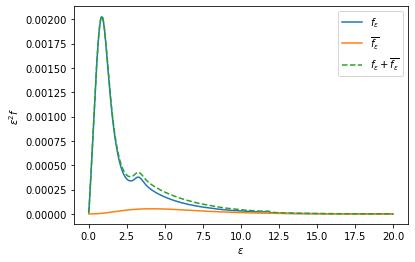

In [15]:
sterile_production(1000, 'electron', 0.0071, 10**(-10), 1e-3, make_plot=True, folder_name="Neutrino Data")

0.05106713667002532

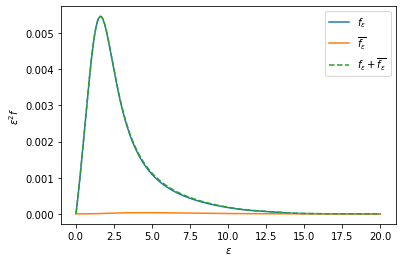

In [16]:
sterile_production(1000, 'electron', 0.0071, 10**(-10), 4.5e-3, make_plot=True, folder_name="Neutrino Data")

0.27792601786846766

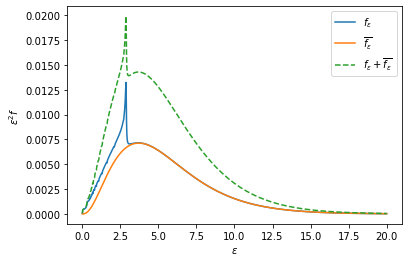

In [17]:
sterile_production(1000, 'electron', 0.0071, 10**(-8), 1e-3, make_plot=True, folder_name="Neutrino Data")

0.27528775689372714

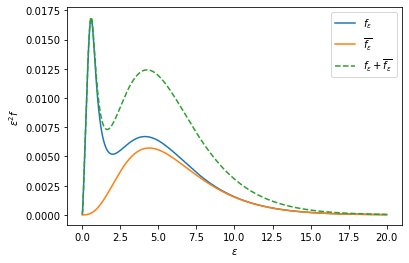

In [18]:
sterile_production(1000, 'electron', 0.0071, 10**(-8), 4.5e-3, make_plot=True, folder_name="Neutrino Data")

##### muon

0.012016930325841734

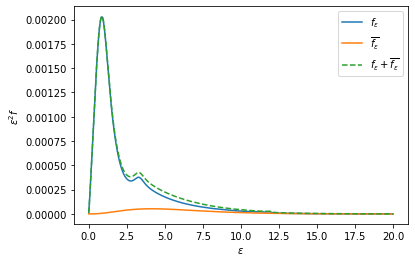

In [19]:
sterile_production(1000, 'muon', 0.0071, 10**(-10), 1e-3, make_plot=True, folder_name="Neutrino Data")

0.051183225402074116

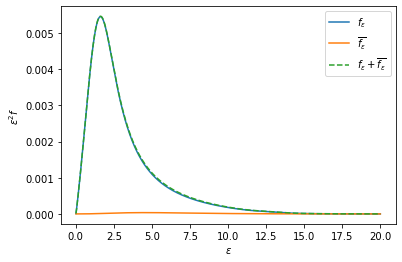

In [20]:
sterile_production(1000, 'muon', 0.0071, 10**(-10), 4.5e-3, make_plot=True, folder_name="Neutrino Data")

0.27896753198129787

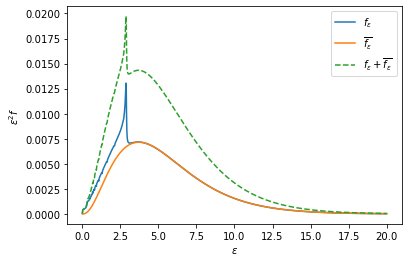

In [21]:
sterile_production(1000, 'muon', 0.0071, 10**(-8), 1e-3, make_plot=True, folder_name="Neutrino Data")

0.27600347669266073

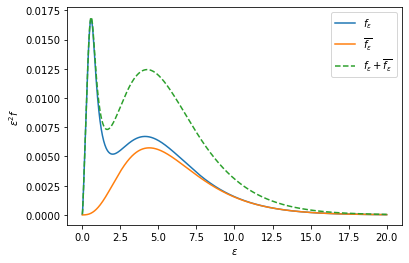

In [22]:
sterile_production(1000, 'muon', 0.0071, 10**(-8), 4.5e-3, make_plot=True, folder_name="Neutrino Data")

##### tau

0.01339784807802863

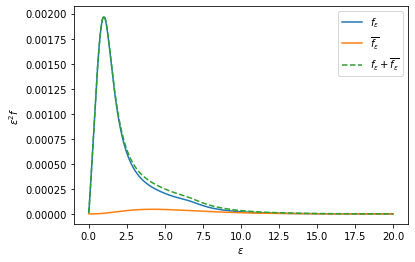

In [23]:
sterile_production(1000, 'tau', 0.0071, 10**(-10), 1e-3, make_plot=True, folder_name="Neutrino Data")

0.0544228595993714

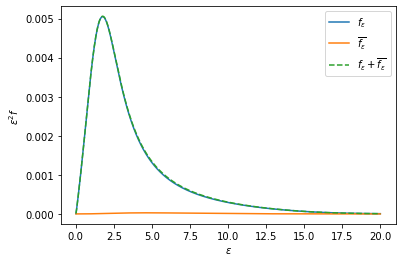

In [24]:
sterile_production(1000, 'tau', 0.0071, 10**(-10), 4.5e-3, make_plot=True, folder_name="Neutrino Data")

0.25537937240424424

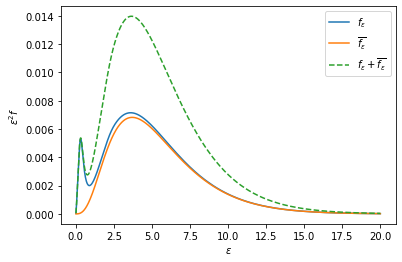

In [25]:
sterile_production(1000, 'tau', 0.0071, 10**(-8), 1e-3, make_plot=True, folder_name="Neutrino Data")

0.23431716264574462

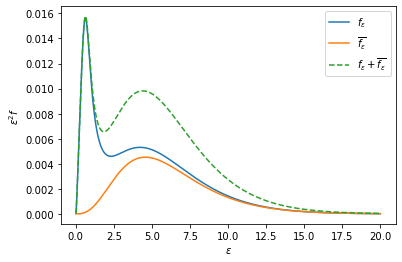

In [26]:
sterile_production(1000, 'tau', 0.0071, 10**(-8), 4.5e-3, make_plot=True, folder_name="Neutrino Data")

## Read Me File:

The function $\textbf{sterile_production}$ has inputs: N; flavor (of active species); sterile mass; vacuum mixing angle; initial lepton number; and an input to produce (make_plot=True) or not produce (make_plot=False) the sterile distributions ($\epsilon^2f_{\epsilon}$ vs $\epsilon$ plots).

$\textbf{sterile_production}$ takes in initial conditions and flavor specification and runs steps_taken, plots the produced $\nu_s$ and $\overline{\nu}_s$ distributions, calculates the produced energy density, $\Omega_s h^2$ value, and creates an .npz file with all the data. The .npz file is named as: "flavor x inital lepton number x mixing angle."